### Ćwiczenia projektowe 4.
Anna Marjankowska, Adrian Żyła

In [315]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, classification_report, confusion_matrix
from imblearn.metrics import specificity_score
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler, TomekLinks
from collections import Counter

import warnings
warnings.filterwarnings('ignore')

In [316]:
data = pd.read_csv('./stroke_zaj3.csv', sep = ';', decimal = ',')
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79,1,0,Yes,Self-employed,Rural,174.12,24,never smoked,1


In [317]:
data.shape

(5109, 11)

In [318]:
print(data['stroke'].value_counts())
print(f"\nKlasa pozytywna stanowi {data['stroke'].value_counts()[1]/data['stroke'].value_counts().sum()*100:0.2f}% całego zbioru danych.")

0    4860
1     249
Name: stroke, dtype: int64

Klasa pozytywna stanowi 4.87% całego zbioru danych.


Jak widzimy klasa $1$ stanowi zalediwe $4.87\%$ całego zbioru, co oznacza, że zbiór danych jest **silnie niezbalansowany**.

Sprawdźmy teraz występowanie braków w danych.

In [319]:
data.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

W danych występują **brakujące wartości** dla zmiennej **BMI**, zdecydowaliśmy się na ich usunięcie.

In [320]:
data = data.dropna()
data.isna().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [321]:
print(f"Po usunięciu wartości brakujących ze zmiennej bmi mamy niezbalansowanie zbioru na poziomie: \
{data['stroke'].value_counts()[1]/data['stroke'].value_counts().sum()*100:0.2f}%.")

Po usunięciu wartości brakujących ze zmiennej bmi mamy niezbalansowanie zbioru na poziomie: 4.26%.


Budowa modelu przed zbalansowaniem zbioru danych

In [322]:
gender_dummies = pd.get_dummies(data['gender'], dtype = int, drop_first = True)
ever_married_dummies = pd.get_dummies(data['ever_married'], dtype = int, drop_first = True)
work_type_dummies = pd.get_dummies(data['work_type'], dtype = int, drop_first = True)
residence_type_dummies = pd.get_dummies(data['Residence_type'], dtype = int, drop_first = True)
smoking_status_dummies = pd.get_dummies(data['smoking_status'], dtype = int, drop_first = True)

In [323]:
data = pd.concat([gender_dummies, data[['age', 'hypertension', 'heart_disease']], ever_married_dummies, work_type_dummies, 
        residence_type_dummies, data[['avg_glucose_level', 'bmi',]], smoking_status_dummies, data[['stroke']]], axis = 1)
data = data.rename(columns = {'Yes': 'ever_married'})
data.head()

,Male,age,hypertension,heart_disease,ever_married,Never_worked,Private,Self-employed,children,Urban,avg_glucose_level,bmi,formerly smoked,never smoked,smokes,stroke
0,1,67,0,1,1,0,1,0,0,1,228.69,36.6,1,0,0,1
2,1,80,0,1,1,0,1,0,0,0,105.92,32.5,0,1,0,1
3,0,49,0,0,1,0,1,0,0,1,171.23,34.4,0,0,1,1
4,0,79,1,0,1,0,0,1,0,0,174.12,24,0,1,0,1
5,1,81,0,0,1,0,1,0,0,1,186.21,29,1,0,0,1


In [324]:
y = data.stroke
X = data.iloc[:, 0:15]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [327]:
results = []

In [328]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [329]:
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

In [330]:
print(classification_report(y_train, y_pred_train))
print(f"Dokładność dla zbioru treningowego: {accuracy_score(y_train, y_pred_train):0.3f}")
print(f"Czułość dla zbioru treningowego: {recall_score(y_train, y_pred_train):0.2f}")
print(f"Specyficzność dla zbioru treningowego: {specificity_score(y_train, y_pred_train):0.2f}")

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3758
           1       1.00      1.00      1.00       168

    accuracy                           1.00      3926
   macro avg       1.00      1.00      1.00      3926
weighted avg       1.00      1.00      1.00      3926

Dokładność dla zbioru treningowego: 1.000
Czułość dla zbioru treningowego: 1.00
Specyficzność dla zbioru treningowego: 1.00


In [331]:
print(classification_report(y_test, y_pred_test))
print(f"Dokładność dla zbioru testowego: {accuracy_score(y_test, y_pred_test):0.3f}")
print(f"Czułość dla zbioru testowego: {recall_score(y_test, y_pred_test):0.3f}")
print(f"Specyficzność dla zbioru testowego: {specificity_score(y_test, y_pred_test):0.3f}")
results.append(['Imbalanced Dataseet', accuracy_score(y_test, y_pred_test), recall_score(y_test, y_pred_test), specificity_score(y_test, y_pred_test)])

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       941
           1       0.25      0.02      0.04        41

    accuracy                           0.96       982
   macro avg       0.60      0.51      0.51       982
weighted avg       0.93      0.96      0.94       982

Dokładność dla zbioru testowego: 0.956
Czułość dla zbioru testowego: 0.024
Specyficzność dla zbioru testowego: 0.997


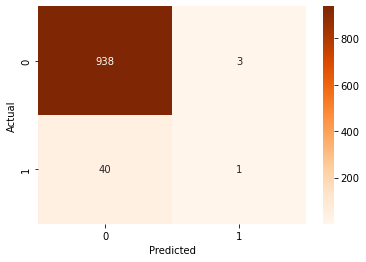

In [332]:
conf_matrix = confusion_matrix(y_test, y_pred_test)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Oranges')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Model dla danych treningowych uzyskał wszytskie metryki równe $100\%$.<br>
Dla zbioru testowego model wciąż ma wysoką dokładonść jednak **czułość jest równa $0\%$**, co oznacza, że model nie sklasyfikował żadnej osoby chorej poprawnie. **Wysoki wynik dokładności jest więc efektem bardzo niezbalansowanego zbioru danych**, klasa chora to jedynie około $4.5\%$ obserwacji. Nasz model jest więc **nieefektywny** mimo wysokiej dokładności.

#### Oversampling - nadporóbkowanie
Polega na stworzeniu nowych próbek klasy mniejszościowej. 

**RandomOverSampler**  
<br>
Zaczniemy od algorytmu RandomOverSampler - metoda losowo wybiera próbki (z powtórzeniami) z klasy mniejszościowej i dodaje je do zbioru danych aż do osiągnięcia równowagi. 

In [340]:
random_over = RandomOverSampler(random_state=42)
X_resampled, y_resampled = random_over.fit_resample(X_train, y_train)

In [341]:
print(f"Przed resamplingiem: {Counter(y_train)}")
print(f"Po resamplingu: {Counter(y_resampled)}")

Przed resamplingiem: Counter({0: 3758, 1: 168})
Po resamplingu: Counter({0: 3758, 1: 3758})


In [342]:
model = RandomForestClassifier(random_state=42)
model.fit(X_resampled, y_resampled)

RandomForestClassifier(random_state=42)

In [343]:
y_pred_train = model.predict(X_resampled)
y_pred_test = model.predict(X_test)

In [344]:
print(classification_report(y_resampled, y_pred_train))
print(f"Dokładność dla zbioru treningowego: {accuracy_score(y_resampled, y_pred_train):0.3f}")
print(f"Czułość dla zbioru treningowego: {recall_score(y_resampled, y_pred_train):0.2f}")
print(f"Specyficzność dla zbioru treningowego: {specificity_score(y_resampled, y_pred_train):0.2f}")

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3758
           1       1.00      1.00      1.00      3758

    accuracy                           1.00      7516
   macro avg       1.00      1.00      1.00      7516
weighted avg       1.00      1.00      1.00      7516

Dokładność dla zbioru treningowego: 1.000
Czułość dla zbioru treningowego: 1.00
Specyficzność dla zbioru treningowego: 1.00


In [345]:
print(classification_report(y_test, y_pred_test))
print(f"Dokładność dla zbioru testowego: {accuracy_score(y_test, y_pred_test):0.3f}")
print(f"Czułość dla zbioru testowego: {recall_score(y_test, y_pred_test):0.3f}")
print(f"Specyficzność dla zbioru testowego: {specificity_score(y_test, y_pred_test):0.3f}")

              precision    recall  f1-score   support

           0       0.96      0.99      0.98       941
           1       0.12      0.02      0.04        41

    accuracy                           0.95       982
   macro avg       0.54      0.51      0.51       982
weighted avg       0.92      0.95      0.94       982

Dokładność dla zbioru testowego: 0.952
Czułość dla zbioru testowego: 0.024
Specyficzność dla zbioru testowego: 0.993


In [346]:
print(classification_report(y_test, y_pred_test))
print(f"Dokładność dla zbioru testowego: {accuracy_score(y_test, y_pred_test):0.3f}")
print(f"Czułość dla zbioru testowego: {recall_score(y_test, y_pred_test):0.3f}")
print(f"Specyficzność dla zbioru testowego: {specificity_score(y_test, y_pred_test):0.3f}")
results.append(['RandomOverSampler', accuracy_score(y_test, y_pred_test), recall_score(y_test, y_pred_test), specificity_score(y_test, y_pred_test)])

              precision    recall  f1-score   support

           0       0.96      0.99      0.98       941
           1       0.12      0.02      0.04        41

    accuracy                           0.95       982
   macro avg       0.54      0.51      0.51       982
weighted avg       0.92      0.95      0.94       982

Dokładność dla zbioru testowego: 0.952
Czułość dla zbioru testowego: 0.024
Specyficzność dla zbioru testowego: 0.993


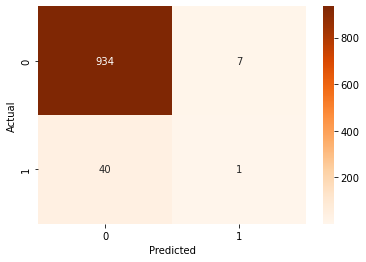

In [347]:
conf_matrix = confusion_matrix(y_test, y_pred_test)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Oranges')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Losowe nadpróbkowanie nieznacznie wpłynęło na poprawę czułości modelu.

**SMOTE**  
<br>
Algorytm SMOTE polega na generowaniu nowych, syntetycznych próbek.  
<br>
Działanie algorytmu SMOTE:
- identyfikacja klasy mniejszościowej
- dla każdej próbki klasy mniejszościowej identyfikacja $k$ (domyślnie $k=5$) najbliższych sąsiadów operając się na wybranej mierze odległości (domyślnie euklidesowa)
- wybranie losowo jednego z $k$ sasiadów, a następnie wygenerowanie nowej próbki, tworząc liniowe kombinaje oryginalnej próbki i jej sąsiada  

Nowo wygenerowane próki są dodawane do zbioru danych, aż klasa mniejszośiowa osiągnie pożądany rozmiar.

In [348]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

In [349]:
print(f"Przed resamplingiem: {Counter(y_train)}")
print(f"Po resamplingu: {Counter(y_resampled)}")

Przed resamplingiem: Counter({0: 3758, 1: 168})
Po resamplingu: Counter({0: 3758, 1: 3758})


In [350]:
model = RandomForestClassifier(random_state=42)
model.fit(X_resampled, y_resampled)

RandomForestClassifier(random_state=42)

In [351]:
y_pred_train = model.predict(X_resampled)
y_pred_test = model.predict(X_test)

In [352]:
print(classification_report(y_resampled, y_pred_train))
print(f"Dokładność dla zbioru treningowego: {accuracy_score(y_resampled, y_pred_train):0.3f}")
print(f"Czułość dla zbioru treningowego: {recall_score(y_resampled, y_pred_train):0.2f}")
print(f"Specyficzność dla zbioru treningowego: {specificity_score(y_resampled, y_pred_train):0.2f}")

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3758
           1       1.00      1.00      1.00      3758

    accuracy                           1.00      7516
   macro avg       1.00      1.00      1.00      7516
weighted avg       1.00      1.00      1.00      7516

Dokładność dla zbioru treningowego: 1.000
Czułość dla zbioru treningowego: 1.00
Specyficzność dla zbioru treningowego: 1.00


In [353]:
print(classification_report(y_test, y_pred_test))
print(f"Dokładność dla zbioru testowego: {accuracy_score(y_test, y_pred_test):0.3f}")
print(f"Czułość dla zbioru testowego: {recall_score(y_test, y_pred_test):0.3f}")
print(f"Specyficzność dla zbioru testowego: {specificity_score(y_test, y_pred_test):0.3f}")
results.append(['SMOTE', accuracy_score(y_test, y_pred_test), recall_score(y_test, y_pred_test), specificity_score(y_test, y_pred_test)])

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       941
           1       0.13      0.15      0.14        41

    accuracy                           0.92       982
   macro avg       0.55      0.55      0.55       982
weighted avg       0.93      0.92      0.93       982

Dokładność dla zbioru testowego: 0.924
Czułość dla zbioru testowego: 0.146
Specyficzność dla zbioru testowego: 0.957


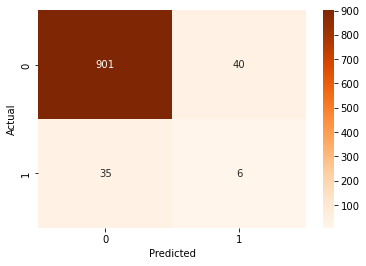

In [354]:
conf_matrix = confusion_matrix(y_test, y_pred_test)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Oranges')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Po zastosowania algorytmu SMOTE czułośc modelu wzrosła, lecz nadal pozostaje niska, co oznacza, że model nie jest efektywny. Jedynie **$6$ spośród $41$ rzeczywiście przypadków chorych** zostało poprawnie sklasyfikowanych.

#### Undersampling - podpróbkowanie  
Polega na usuwanie obserwacji z klasy mniejszościowej.

**RandomUnderSampler**  
<br>
Algorytm RandomUnderSampler - metoda losowo wybiera próbki (z powtórzeniami) z klasy mniejszościowej i usuwa je ze zbioru danych aż do osiągnięcia równowagi. 

In [355]:
random_under = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = random_under.fit_resample(X_train, y_train)

print(f"Przed resamplingiem: {Counter(y_train)}")
print(f"Po resamplingu: {Counter(y_resampled)}")

Przed resamplingiem: Counter({0: 3758, 1: 168})
Po resamplingu: Counter({0: 168, 1: 168})


In [356]:
model = RandomForestClassifier(random_state=42)
model.fit(X_resampled, y_resampled)

RandomForestClassifier(random_state=42)

In [357]:
y_pred_train = model.predict(X_resampled)
y_pred_test = model.predict(X_test)

In [358]:
print(classification_report(y_resampled, y_pred_train))
print(f"Dokładność dla zbioru treningowego: {accuracy_score(y_resampled, y_pred_train):0.3f}")
print(f"Czułość dla zbioru treningowego: {recall_score(y_resampled, y_pred_train):0.2f}")
print(f"Specyficzność dla zbioru treningowego: {specificity_score(y_resampled, y_pred_train):0.2f}")

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       168
           1       1.00      1.00      1.00       168

    accuracy                           1.00       336
   macro avg       1.00      1.00      1.00       336
weighted avg       1.00      1.00      1.00       336

Dokładność dla zbioru treningowego: 1.000
Czułość dla zbioru treningowego: 1.00
Specyficzność dla zbioru treningowego: 1.00


In [359]:
print(classification_report(y_test, y_pred_test))
print(f"Dokładność dla zbioru testowego: {accuracy_score(y_test, y_pred_test):0.3f}")
print(f"Czułość dla zbioru testowego: {recall_score(y_test, y_pred_test):0.3f}")
print(f"Specyficzność dla zbioru testowego: {specificity_score(y_test, y_pred_test):0.3f}")
results.append(['RandomUnderSampler', accuracy_score(y_test, y_pred_test), recall_score(y_test, y_pred_test), specificity_score(y_test, y_pred_test)])

              precision    recall  f1-score   support

           0       0.99      0.71      0.83       941
           1       0.11      0.85      0.20        41

    accuracy                           0.72       982
   macro avg       0.55      0.78      0.51       982
weighted avg       0.95      0.72      0.80       982

Dokładność dla zbioru testowego: 0.716
Czułość dla zbioru testowego: 0.854
Specyficzność dla zbioru testowego: 0.710


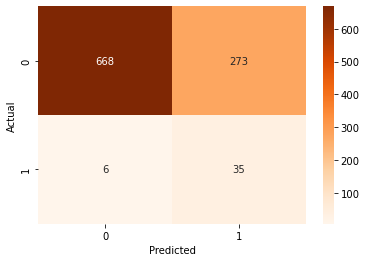

In [360]:
conf_matrix = confusion_matrix(y_test, y_pred_test)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Oranges')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Losowe usunięcie próbek z danych poprawiło **czułość modelu**, co oznacza, że model **poprawnie klasyfikuje większość chorych osób**. Zmalała natomiast specyficzność, co prowadzi do zwiększonej licbzy fałszywych alarmów.  
Z macierzy pomyłek możemy odczytać, że **liczba osób, które zostały błędnie sklasyfikowane jako zdrowe jest realnie niska - $6$**. 
Kosztem poprawy czułości spadła natomiast dokładność modelu, co wynika z losowego usunięcia próbek. 

**Tomek Links**  
<br>
Algorytm Tomek Links polega na **usuwaniu próbek z klasy większościowej, które są blisko próbek z klasy mniejszościowej**.<br>
<br>
Działanie algorytmu Tomek Links:
- identyfikacja par próbek Tomek Link, czyli takich, które są dla siebie najbliższymi sąsiadami, ale należą do różnych klas
- usunięcie próbki należącej do klasy większościowej

Próbki określane jako **Tomek Link często są trudne do sklasyfikowania i wprowadzają szum**. 
Dużą więc zaletą tego algorytmu jest **redukowanie szumu oraz poprawa dokładności modelu**.  
Należy jednak pamiętać, że metoda ta niekoniecznie usuwnie wszytskie obserwacjie z klasy większościowej, które powodują nierównowagę. 
W praktyce często łączy się metodę Tomek Links z innymi alogorytmami OverSamplingu lub UnderSamplingu.

In [361]:
tomek_links = TomekLinks()
X_resampled, y_resampled = tomek_links.fit_resample(X_train, y_train)

print(f"Przed resamplingiem: {Counter(y_train)}")
print(f"Po resamplingu: {Counter(y_resampled)}")

Przed resamplingiem: Counter({0: 3758, 1: 168})
Po resamplingu: Counter({0: 3681, 1: 168})


Jak widzimy, algorytm usunął jedynie $77$ obserwacji, co nie doprowadziło do zbalansowania zbioru danych. 
Połączmy więc metodę **Tomek Links** z algorytmem **SMOTE**. 

In [362]:
smote = SMOTE(random_state=42)
X_resampled2, y_resampled2 = smote.fit_resample(X_resampled, y_resampled)

print(f"Przed resamplingiem: {Counter(y_resampled)}")
print(f"Po resamplingu: {Counter(y_resampled2)}")

Przed resamplingiem: Counter({0: 3681, 1: 168})
Po resamplingu: Counter({0: 3681, 1: 3681})


In [363]:
model = RandomForestClassifier(random_state=42)
model.fit(X_resampled2, y_resampled2)

RandomForestClassifier(random_state=42)

In [364]:
y_pred_train = model.predict(X_resampled2)
y_pred_test = model.predict(X_test)

In [365]:
print(classification_report(y_resampled2, y_pred_train))
print(f"Dokładność dla zbioru treningowego: {accuracy_score(y_resampled2, y_pred_train):0.3f}")
print(f"Czułość dla zbioru treningowego: {recall_score(y_resampled2, y_pred_train):0.2f}")
print(f"Specyficzność dla zbioru treningowego: {specificity_score(y_resampled2, y_pred_train):0.2f}")

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3681
           1       1.00      1.00      1.00      3681

    accuracy                           1.00      7362
   macro avg       1.00      1.00      1.00      7362
weighted avg       1.00      1.00      1.00      7362

Dokładność dla zbioru treningowego: 1.000
Czułość dla zbioru treningowego: 1.00
Specyficzność dla zbioru treningowego: 1.00


In [366]:
print(classification_report(y_test, y_pred_test))
print(f"Dokładność dla zbioru testowego: {accuracy_score(y_test, y_pred_test):0.3f}")
print(f"Czułość dla zbioru testowego: {recall_score(y_test, y_pred_test):0.3f}")
print(f"Specyficzność dla zbioru testowego: {specificity_score(y_test, y_pred_test):0.3f}")
results.append(['Tomek Links + SMOTE', accuracy_score(y_test, y_pred_test), recall_score(y_test, y_pred_test), specificity_score(y_test, y_pred_test)])

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       941
           1       0.11      0.12      0.11        41

    accuracy                           0.92       982
   macro avg       0.53      0.54      0.54       982
weighted avg       0.93      0.92      0.92       982

Dokładność dla zbioru testowego: 0.921
Czułość dla zbioru testowego: 0.122
Specyficzność dla zbioru testowego: 0.955


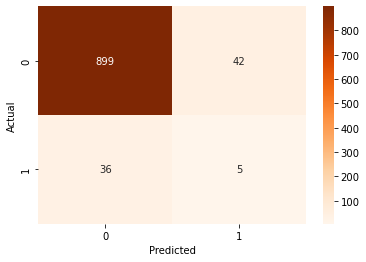

In [367]:
conf_matrix = confusion_matrix(y_test, y_pred_test)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Oranges')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Przedstawmy jeszcze raz wyniki dla wszytskich modeli, które zostały przez nas zastosowane:

In [368]:
columns = ['Model', 'Dokladność', 'Czułość', 'Specyficzność']
df = pd.DataFrame(results, columns=columns, index=None)
df = df.round(3)
df

,Model,Dokladność,Czułość,Specyficzność
0,Imbalanced Dataseet,0.956,0.024,0.997
1,RandomOverSampler,0.952,0.024,0.993
2,RandomOverSampler,0.952,0.024,0.993
3,SMOTE,0.924,0.146,0.957
4,RandomUnderSampler,0.716,0.854,0.710
5,Tomek Links + SMOTE,0.921,0.122,0.955


**Najlepsze wyniki w zakresie czułości osiągnięto za pomocą RandomUnderSampler**, ale kosztem dokładności.  
Tomek Links + SMOTE pokazuje obiecujące wyniki jako zbalansowana metoda, ale czułość wciąż wymaga poprawy.